# Domaći 1

## 1. Primjer statičkog sistema

Neka je "nepoznati" sistem opisan algebarskom jednačinom $y = 3u + 7$. Kako se pravimo da "ne znamo" opis sistema, cilj je provjeriti da li je sistem **statički**.

**Statički sistemi** imaju osobinu da se **ne mijenjaju tokom vremena** i da njihovi **trenutni izlazi** zavise **samo od trenutnih ulaza** (odnosno, **nemaju memoriju**).

Kako možemo prepoznati da li je sistem statički samo na osnovu podataka o ulaznom i izlaznom signalu? Naime, gledaćemo šta se dešava kada dođe do promjene u sistemu. Generisaćemo proizvoljno izabran ulazni signal kao

In [1]:
t = 0:0.01:10;                         

u_2step = @(t) 1 .* (t < 5) + 4 .* (t >= 5); 

Provućićemo dati signal kroz naš "sistem" koji za nas predstavlja *black*-*box*. Definišimo pomenuti "nepoznati" sistem

In [2]:
systemS = @(t, u) 3 .* u + 7;

Generišimo ulaz

In [3]:
u_static = u_2step(t)

u_static = 1×1001 double
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
...

dok će izlaz biti

In [4]:
y_static = systemS(t, u_static)

y_static = 1×1001 double
    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10    10
...

Ako iscrtamo ulazni signal, kao i odziv sistema **na vremenskoj osi**

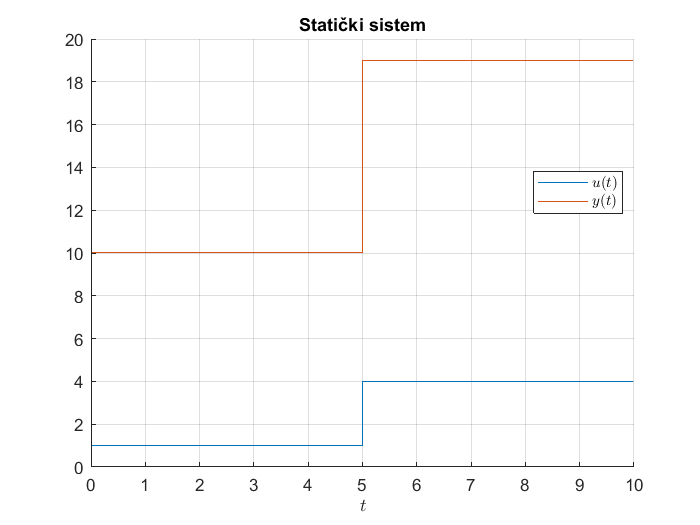

In [5]:
figure;
hold on;
grid on;

stairs(t, u_static, 'LineWidth', 1)
stairs(t, y_static, 'LineWidth', 1)
title('Statički sistem')
xlabel('$t$', 'Interpreter', 'Latex')

l = legend('$u(t)$', '$y(t)$', 'Interpreter', 'Latex');
l.Location = 'best';

hold off;

Kako vidimo, na trenutnu promjenu ulaznog signala, sistem posljedično reaguje sopstvenom trenutnom promjenom (u istom trenutku vremena, ulazni i izlazni signal se mijenjaju). Naime, to znači da novo stanje sistema ne zavisi od prethodnog - sistem **nema memoriju**, što implicira da je **statički** (glavni primjer ovoga jeste *struja koja teče kroz otpornik* - ako je otpornik prethodno bio na nekom naponu, kada ga postavimo na novi napon struja će automatski dostići odgovarajuću vrijednost i biti konstantna, nezavisno od toga koja struja je prethodno tekla kroz otpornik).

Takođe, odnos između ulaznog i njemu posljedično izlaznog signala se ne mijenja u kojem god periodu vremena pobudimo sistem - **za isti ulaz**, **imaćemo isti jedinstveni izlaz**. Ovu činjenicu dokazujemo gledajući izlazni signal direktno u funkciji ulaznog signala, odnosno $y = y(u)$.

Generišimo nekoliko *step* primjera ulaznog signala i njemu odgovarajućih izlaznih signala.

In [6]:
u_example_static = rand(1, 100) .* 10;
y_example_static = systemS(t, u_example_static);

Iscrtajmo ovaj odnos na grafiku.

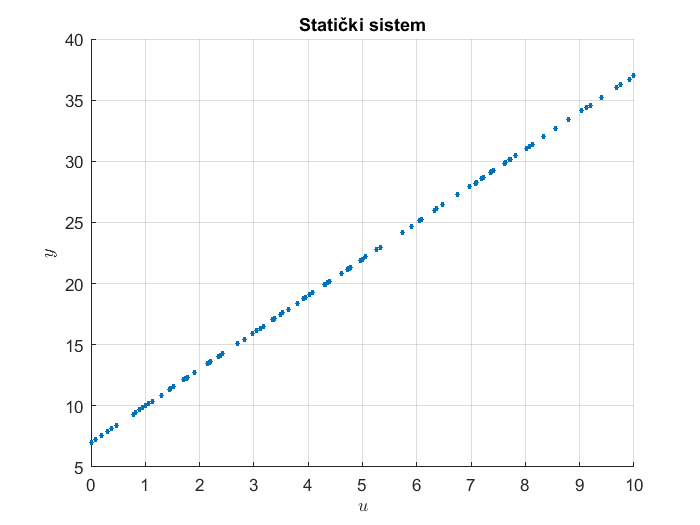

In [7]:
figure;
hold on;
grid on;

scatter(u_example_static, y_example_static, 8, 'filled')
title('Statički sistem')
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y$', 'Interpreter', 'Latex')

hold off;

Na slici iznad, jasno vidimo da svaka vrijednost ulaza ima sebi pridruženu jedinstvenu vrijednost izlaza.

## 2. Primjer dinamičkog sistema

Neka je "nepoznat" sistem opisan diferencijalnom jednačinom $\dot{x} = -3x + 5u$, a izlaz dat kao $y = 2x$.

In [8]:
systemD = @(t, x, u) -3 * x + 5 * u(t);
y = @(t, x) 2 .* x;

Cilj je provjeriti da li je sistem **dinamički**. Za razliku od statičkih sistema, **dinamički sistemi** posjeduju **memoriju** - njihova trenutna stanja zavise kako od **trenutnih** vrijednosti ulaza, tako i od **prethodnih** vrijednosti. Odnos između ulaznih i njima posljedičnih izlaznih signala nije konstantan za bilo koji trenutak vremena - **za isti ulaz**, **nećemo imati jedinstven izlaz**. Ovo je posljedica osobine memorije, kao i osjetljivosti na inicijalne uslove (primjer jeste *napon na kondenzatoru* - nije isto ako počnemo da punimo prazan kondenzator i kondenzator koji je prethodno bio donekle pun).

Pobudimo sistem istim ulaznim signalom kao u prethodnom razmatranju.

In [9]:
x0 = 0;

[~, x] = ode45(@(t, x) systemD(t, x, u_2step), t, x0);
y_dynamic = y(t, x);

Iscrtajmo na grafiku.

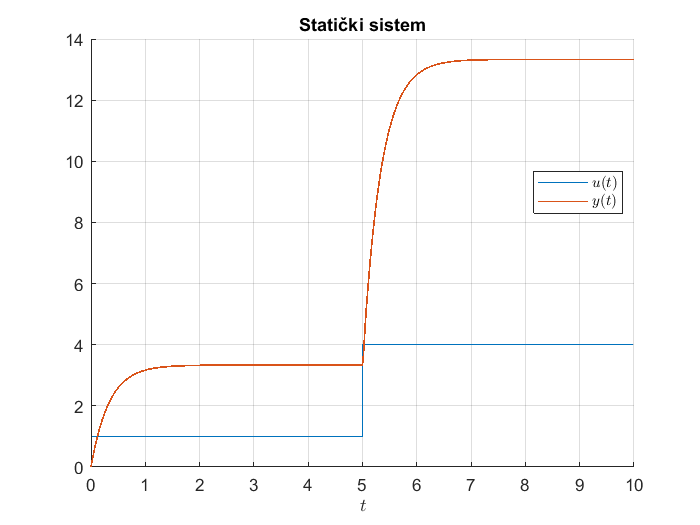

In [10]:
figure;
hold on;
grid on;

stairs(t, u_2step(t), 'LineWidth', 1)
plot(t, y_dynamic, 'LineWidth', 1)
title('Statički sistem')
xlabel('$t$', 'Interpreter', 'Latex')

l = legend('$u(t)$', '$y(t)$', 'Interpreter', 'Latex');
l.Location = 'best';

hold off;

Očigledno, sistemu je potrebno da uđe u stacionarno stanje - promjena nije trenutna, već postoji **tranzijentni period**, što nam ukazuje da je sistem **dinamički**. 

Pokušajmo pobuditi isti sistem istom pobudom, ali sa dva različita inicijalna uslova.

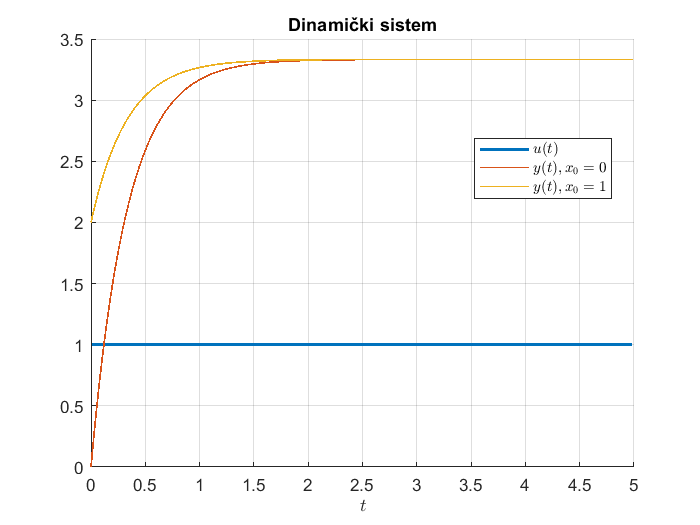

In [11]:
x01 = 0;
x02 = 1;

[~, x1] = ode45(@(t, x) systemD(t, x, u_2step), t(t < 5), x01);
y_dynamic1 = y(t, x1);
[~, x2] = ode45(@(t, x) systemD(t, x, u_2step), t(t < 5), x02);
y_dynamic2 = y(t, x2);

figure;
hold on;
grid on;

stairs(t(t < 5), u_2step(t(t < 5)), 'LineWidth', 2)
plot(t(t < 5), y_dynamic1, 'LineWidth', 1)
plot(t(t < 5), y_dynamic2, 'LineWidth', 1)
title('Dinamički sistem')
xlabel('$t$', 'Interpreter', 'Latex')

l = legend('$u(t)$', '$y(t), x_{0} = 0$', '$y(t), x_{0} = 1$', 'Interpreter', 'Latex');
l.Location = 'best';

hold off;

Jasno je da za isti ulazni signal, ali sa drugačijim početnim uslovima, izlazni signal nema istu vrijednost.

Ono što možemo još da uradimo jeste da iscrtamo odnos ulaznog signala i izlaznog signala, te ako za jednu vrijednost ulaznog signala imamo više od jedne vrijednosti izlaznog signala, sistem je **dinamički**.

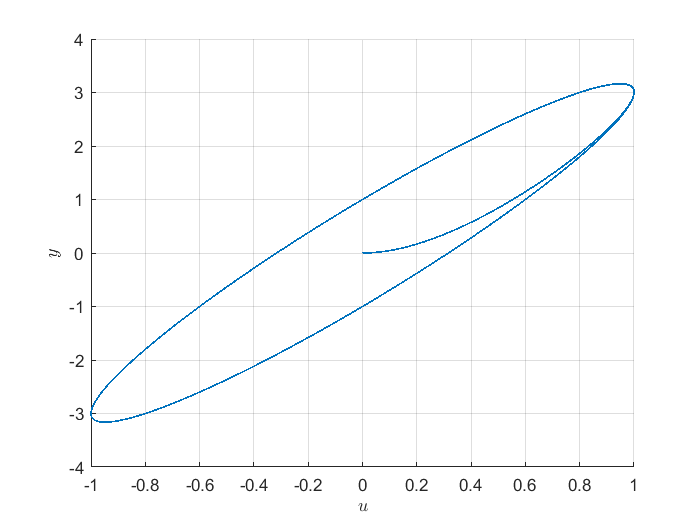

In [12]:
u_example_dynamic = @(t) sin(t);
[~, x_example_dynamic] = ode45(@(t, x) systemD(t, x, u_example_dynamic), t, 0);

figure;
hold on;
grid on;
plot(u_example_dynamic(t), y(t, x_example_dynamic), 'LineWidth', 1)
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y$', 'Interpreter', 'Latex')

hold off;

## 3. Linearni i nelinearni sistemi

### 3.1. Princip superpozicije

Glavna razlika između linearnih i nelinearnih sistema leži u "poštovanju" **principa superpozicije** - sistem je po prirodi **linearan** ako važi da, za dva ulaza $u_{1}$ i $u_{2}$ skaliranih konstantama $a$ i $b$, izlaz izgleda kao
$$
y = \mathcal{S}(au_{1} + bu_{2}) = \mathcal{S}(au_{1}) + \mathcal{S}(bu_{2}) = a\mathcal{S}(u_{1}) + b\mathcal{S}(u_{2}) = y_{1} + y_{2}
$$

Uzmimo strukturu "nepoznatog" linearnog sistema
$$
\dot{x} = -3x + 2u
$$
$$
y = x
$$

In [13]:
systemL = @(t, x, u) -3 * x + 2 * u(t);

te pobudimo ga primjerima ulaznih signala sinusnog oblika različitih frekvencija

In [14]:
Ts = 0.0001; fs = 1 / Ts;
tfinal = 10;
t = 0:Ts:tfinal;
N = length(t);
f1 = 10; w1 = 2 * pi * f1;
f2 = 20; w2 = 2 * pi * f2;

[~, y1] = ode45(@(t, x) systemL(t, x, @(t) sin(w1 * t)), t, 0);
[~, y2] = ode45(@(t, x) systemL(t, x, @(t) sin(w2 * t)), t, 0);

Iscrtajmo na graficima pobudne signale i izlazne signale.

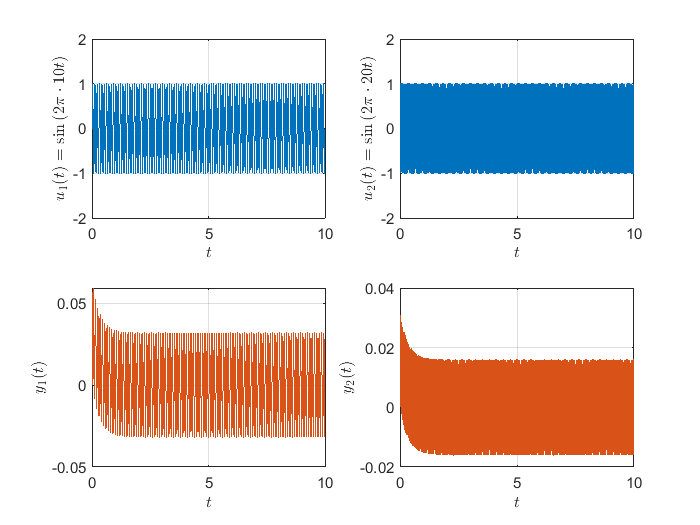

In [15]:
figure;
hold on;

subplot(221)
plot(t, sin(w1 * t))
grid on;
ylim([-2, 2])
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$u_{1}(t) = \sin{(2\pi \cdot 10 t)}$', 'Interpreter', 'Latex')

subplot(222)
plot(t, sin(w2 * t))
grid on;
ylim([-2, 2])
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$u_{2}(t) = \sin{(2\pi \cdot 20 t)}$', 'Interpreter', 'Latex')

subplot(223)
plot(t, y1, 'Color', '#D95319')
grid on;
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$y_{1}(t)$', 'Interpreter', 'Latex')

subplot(224)
plot(t, y2, 'Color', '#D95319')
grid on;
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$y_{2}(t)$', 'Interpreter', 'Latex')

hold off;

Sada, provjerimo da li će važiti jednačina superpozicije

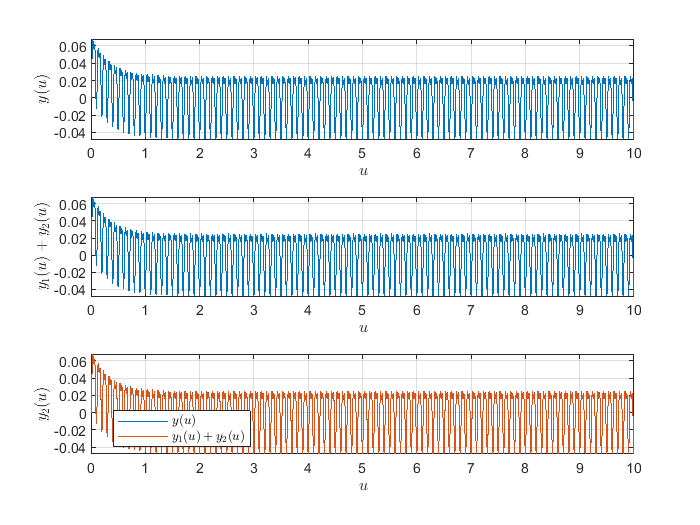

In [16]:
[~, y_superposed] = ode45(@(t, x) systemL(t, x, @(t) sin(w1 * t) + sin(w2 * t)), t, 0);

figure;
hold on;

subplot(311)
plot(t, y_superposed)
grid on
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y(u)$', 'Interpreter', 'Latex')

subplot(312)
plot(t, y1 + y2)
grid on;
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y_{1}(u) + y_{2}(u)$', 'Interpreter', 'Latex')

subplot(313)
plot(t, y_superposed)
hold on;
plot(t, y1 + y2)
grid on;
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y_{2}(u)$', 'Interpreter', 'Latex')

l = legend('$y(u)$', '$y_{1}(u) + y_{2}(u)$', 'Interpreter', 'Latex');
l.Location = 'best';

hold off;

uviđamo da se dva grafika **podudaraju**, što će značiti da važi princip superpozicije, te je sistem **linearan**.

Slično, ako uzmemo primjer strukture nelinearnog sistema
$$
\dot{x} = e^{-x} + 3\cos{(2u)}
$$

In [17]:
systemNL = @(t, x, u) exp(-x) + 3 * cos(2 * x * u(t));

te pobudimo ga istim signalima kao u slučaju pobude linearnog sistema

In [18]:
[~, y1] = ode45(@(t, x) systemNL(t, x, @(t) sin(w1 * t)), t, 0);
[~, y2] = ode45(@(t, x) systemNL(t, x, @(t) sin(w2 * t)), t, 0);

i iscrtamo na grafiku

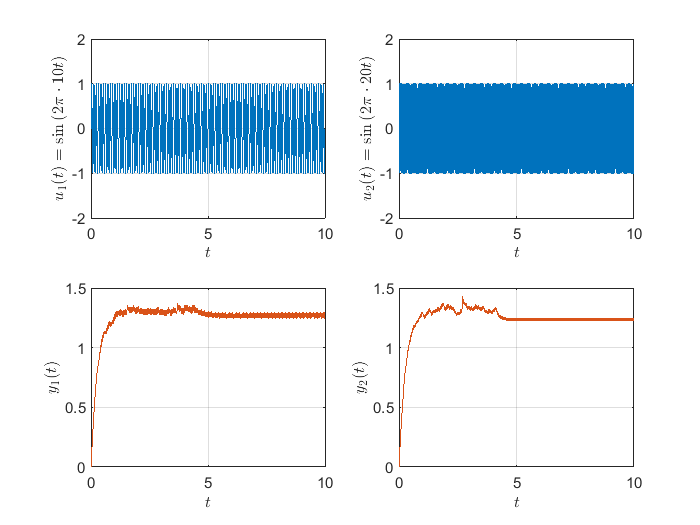

In [19]:
figure;
hold on;

subplot(221)
plot(t, sin(w1 * t))
grid on;
ylim([-2, 2])
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$u_{1}(t) = \sin{(2\pi \cdot 10 t)}$', 'Interpreter', 'Latex')

subplot(222)
plot(t, sin(w2 * t))
grid on;
ylim([-2, 2])
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$u_{2}(t) = \sin{(2\pi \cdot 20 t)}$', 'Interpreter', 'Latex')

subplot(223)
plot(t, y1, 'Color', '#D95319')
grid on;
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$y_{1}(t)$', 'Interpreter', 'Latex')

subplot(224)
plot(t, y2, 'Color', '#D95319')
grid on;
xlabel('$t$', 'Interpreter', 'Latex')
ylabel('$y_{2}(t)$', 'Interpreter', 'Latex')

hold off;

i naposlijetku, provjerimo da li važi princip superpozicije

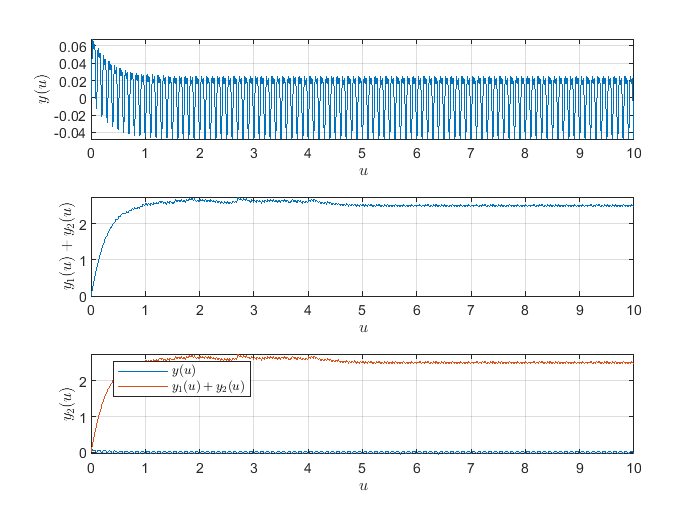

In [20]:
[~, y_superposed] = ode45(@(t, x) systemL(t, x, @(t) sin(w1 * t) + sin(w2 * t)), t, 0);

figure;
hold on;

subplot(311)
plot(t, y_superposed)
grid on
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y(u)$', 'Interpreter', 'Latex')

subplot(312)
plot(t, y1 + y2)
grid on;
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y_{1}(u) + y_{2}(u)$', 'Interpreter', 'Latex')

subplot(313)
plot(t, y_superposed)
hold on;
plot(t, y1 + y2)
grid on;
xlabel('$u$', 'Interpreter', 'Latex')
ylabel('$y_{2}(u)$', 'Interpreter', 'Latex')

l = legend('$y(u)$', '$y_{1}(u) + y_{2}(u)$', 'Interpreter', 'Latex');
l.Location = 'best';

hold off;

uviđamo da se dva grafika **ne podudaraju**, što će značiti da ne važi princip superpozicije, te je sistem **nelinearan**.

### 3.2. Frekvencijski spektar

Analiza linearnih sistema u frekvencijskom domenu pokazuje da takvi **ne mijenjaju frekvencijsku strukturu signala** (frekvencije ulaznog i izlaznog signala ostaju iste), već samo **amplitude** i **fazne pomjeraje** harmonika.

In [42]:
function s = u(t)
    s = 0;
    for i = 1:20
        s = s + sin(2 * pi * i * t);
    end
end

[~, y1] = ode45(@(t, x) systemL(t, x, @(t) u(t)), t, 0);   % Linearan sistem
[~, y2] = ode45(@(t, x) systemNL(t, x, @(t) u(t)), t, 0);  % Nelinearan sistem

Za digitalnu spektralnu analizu signala koristimo **FFT** (eng. *Fast Fourier Transform*). Naime, odradićemo *FFT* ulaznog signala. Podrazumijevano je da, ako ne proslijedimo dodatni parametar koji predstavlja broj tačaka u kojima će se raditi *FFT*, metoda će uzeti dužinu ulaznog signala.

In [43]:
function s = u(t)
    s = 0;
    for i = 1:20
        s = s + sin(2 * pi * i * t);
    end
end

U = fftshift(fft(u(t)));
sampleAxis = linspace(-N/2, N/2, N);

Pogledajmo kako izgleda amplitudski spektar signala

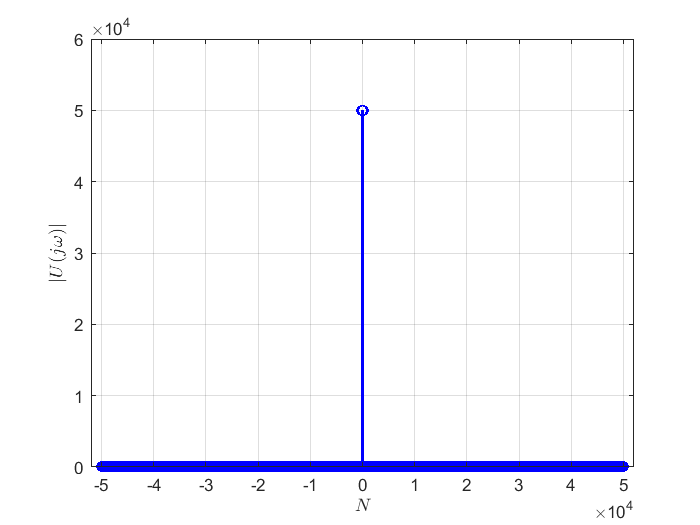

In [44]:
figure;

stem(sampleAxis, abs(U), 'Color', 'blue')
grid on;
xlabel('$N$', 'Interpreter', 'Latex')
ylabel('$|U(j\omega)|$', 'Interpreter', 'Latex')

Na apscisi su prikazani brojevi odbiraka, dok se na ordinati vidi amplitudski spektar (naravno, skaliran za $\frac{1}{T_{s}}$). Međutim, ovako ne možemo mnogo zaključiti koje frekvencije su prisutne u (ulaznom) signalu, pa je potrebno dodatno skaliranje apscise.

Naime, učestanost odabiranja je $f_{s}$ (odnosno, $\omega_{s}$), pa vrijedi apscisu prikazati kao red frekvencija. Kako je *FFT* odrađen u $N$ odbiraka, ima smisla "poredati" apscisu frekvencijama udaljenim međusobno za $\frac{f_{s}}{N}$ (odnosno, $\frac{\omega_{s}}{N}$).

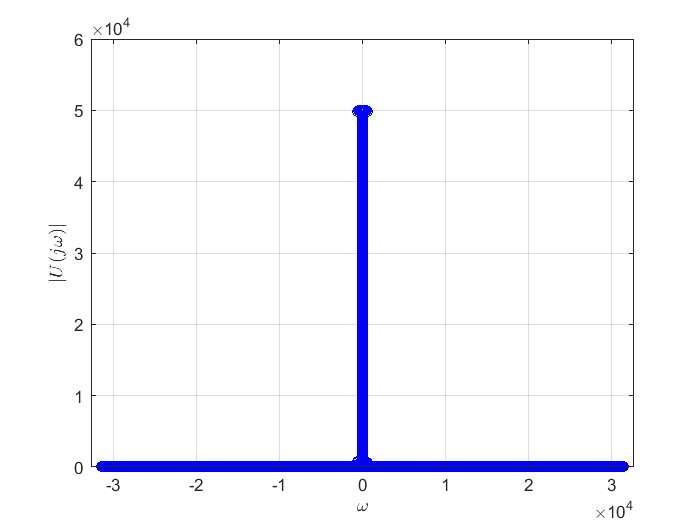

In [27]:
wAxis = linspace(-pi*fs, pi*fs, N);

figure;

stem(wAxis, abs(U), 'Color', 'blue')
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|U(j\omega)|$', 'Interpreter', 'Latex')

Na slici iznad, apscisa je prikazana u razmjeri kružnih frekvencija $\omega$. Kako bi slika bila jasnija, približićemo uvid oko nulte frekvencije

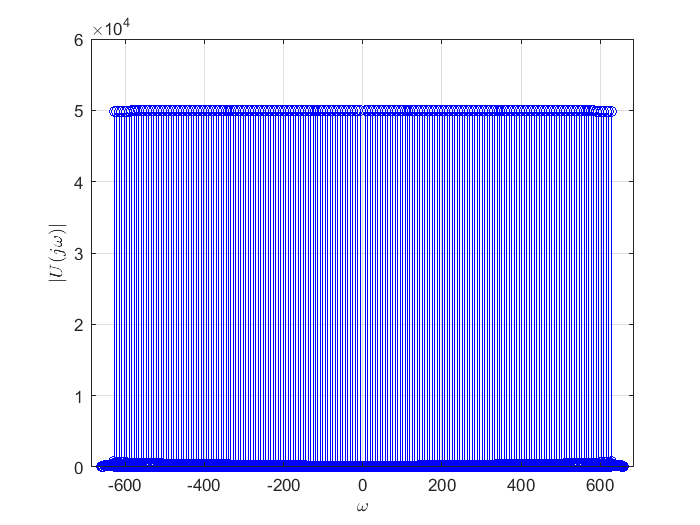

In [37]:
figure;

B = 1050;
stem(wAxis(fix(N/2)-B:fix(N/2)+B), abs(U(fix(N/2)-B:fix(N/2)+B)), 'Color', 'blue')
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|U(j\omega)|$', 'Interpreter', 'Latex')

Amplitudski spektar je simetričan oko ordinate, te možemo samo prikazati desni dio.

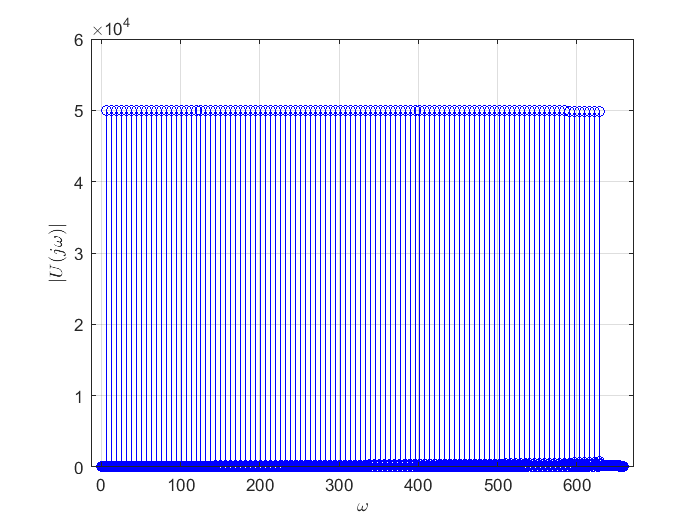

In [38]:
figure;

stem(wAxis(fix(N/2)+1:fix(N/2)+B), abs(U(fix(N/2)+1:fix(N/2)+B)), 'Color', 'blue')
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|U(j\omega)|$', 'Interpreter', 'Latex')

drawnow;

Očigledno je da ulazni signal posjeduje komponentu na $2\pi10\frac{\text{rad}}{\text{s}}$, baš kao što smo i očekivali.

Sada, pogledajmo spektar izlaznog signala.

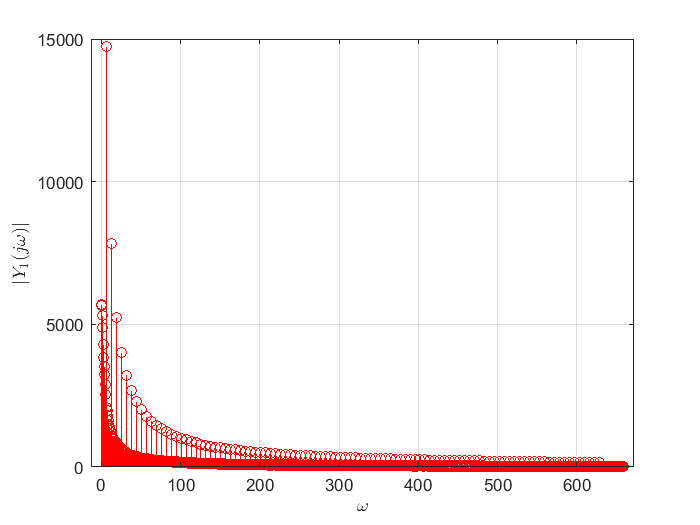

In [39]:
figure;

Y1 = fftshift(fft(y1));
stem(wAxis(fix(N/2)+1:fix(N/2)+B), abs(Y1(fix(N/2)+1:fix(N/2)+B)), 'Color', 'red')
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|Y_{1}(j\omega)|$', 'Interpreter', 'Latex')

Ako uporedimo dva spektra

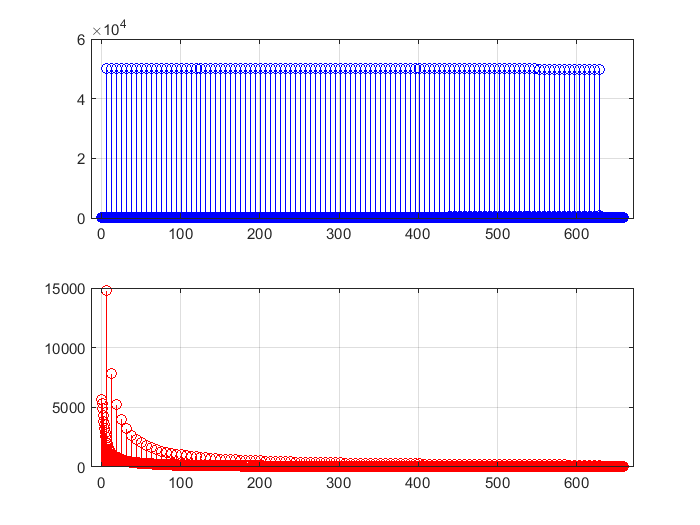

In [41]:
figure;
hold on;

subplot(211)
stem(wAxis(fix(N/2)+1:fix(N/2)+B), abs(U(fix(N/2)+1:fix(N/2)+B)), 'Color', 'blue')
grid on;

subplot(212)
stem(wAxis(fix(N/2)+1:fix(N/2)+B), abs(Y1(fix(N/2)+1:fix(N/2)+B)), 'Color', 'red')
grid on;

vidimo da se pojavljuju harmonici iz ulaznog signala, dok oni koji nisu bili prisutni u ulaznom signalu, nisu ni u izlaznom, što potvrđuje da je naš sistem **linearan**.

Uradimo to isto za nelinearan slučaj

In [ ]:
figure;

Y2 = fftshift(fft(y2));
stem(wAxis(fix(N/2)+1:fix(N/2)+50), abs(Y2(fix(N/2)+1:fix(N/2)+50)), 'Color', 'blue')
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|Y_{2}(j\omega)|$', 'Interpreter', 'Latex')

i upoređujući dva spektra

In [ ]:
figure;
hold on;

subplot(211)
stem(wAxis(fix(N/2)+1:fix(N/2)+201), abs(U(fix(N/2)+1:fix(N/2)+201)), 'Color', 'blue')
grid on;

subplot(212)
stem(wAxis(fix(N/2)+1:fix(N/2)+201), abs(Y2(fix(N/2)+1:fix(N/2)+201)), 'Color', 'red')
grid on;

uočavamo da su se pojavile do sada "neviđene" komponente, dok su harmonici ulaznog signala potpuno potisnuti. Izvodimo zaključak da je sistem **nelinearan**.

## Identifikacija sistema

Amplitudski spektar dosta će nam reći o samoj strukturi sistema - položaju polova i nula. Ako uzmemo sistem iz prethodnog primjera
$$
\dot{x} = -3x + 2u
$$
$$
y = x
$$
očekujemo identifikaciju funkcije prenosa
$$
\mathcal{G}(s) = \frac{\mathcal{Y}(s)}{\mathcal{U}(s)} = \frac{2}{s + 3}
$$

Za datu identifikaciju, potrebna je konstrukcija **Bodeovog amplitudskog dijagrama**, koju ćemo dobiti po formuli
$$
\mathcal{A} = 20\log{(|\mathcal{G}(j\omega)|)} = 20\log{\left(\left|\frac{\mathcal{Y}(j\omega)}{\mathcal{U}(j\omega)}\right|\right)}
$$

Prvenstveno, generišimo ulazni signal sastavljen od sinusnih harmonika

In [ ]:
F = 0:0.01:250;
s = 0;
for f = F
    s = s + sin(2 * pi * f * t);
end

Njegov amplitudski spektar izgleda kao

In [ ]:
figure;

S = fft(s);
stem(wAxis(fix(N/2)+1:end), abs(fftshift(S(fix(N/2)+1:end))))
grid on;
xlabel('$\omega$', 'Interpreter', 'Latex')
ylabel('$|U(j\omega)|$', 'Interpreter', 'Latex')

drawnow;

Kada "propustimo" signal kroz naš linearni sistem, dobijamo